# Prueba de evaluación 2
Parte 2


El Archivo

In [1]:
%ls -l *.xml

 Volume in drive C is Giovanni
 Volume Serial Number is 767E-2C45

 Directory of C:\Users\Giovanni\Documents\Master\TrabajosFinales\Phyton\Evaluacion Continua 2


 Directory of C:\Users\Giovanni\Documents\Master\TrabajosFinales\Phyton\Evaluacion Continua 2

10/12/2016  20:21            23,235 UnplannedEvents.xml
               1 File(s)         23,235 bytes
               0 Dir(s)  136,171,954,176 bytes free


In [2]:
import pandas as pd
from lxml import objectify
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy, pylab

In [3]:
parsed = objectify.parse('UnplannedEvents.xml')
root = parsed.getroot()
print root.tag
print root.attrib
print root.countchildren()

{http://datex2.eu/schema/1_0/1_0}d2LogicalModel
{'modelBaseVersion': '1.0'}
2


In [4]:
situation=[]
situationRecord=[]
probabilityOfOccurrence=[]
impactOnTraffic =[]
capacityRemaining=[]
numberOfLanesRestricted=[]
numberOfOperationalLanes =[]
originalNumberOfLanes = []
trafficRestrictionType = []
delayTimeValue = []
overallStartTime = []
overallEndTime = []
roadMaintenanceType = []

for row in root.payloadPublication.situation:
    situation.append(row.get('id'))
    probabilityOfOccurrence.append(row.situationRecord.probabilityOfOccurrence.text)
    impactOnTraffic.append(row.situationRecord.impact.impactOnTraffic.text)
    capacityRemaining.append(float(row.situationRecord.impact.impactDetails.capacityRemaining.text))
    numberOfLanesRestricted.append(int(row.situationRecord.impact.impactDetails.numberOfLanesRestricted.text))
    numberOfOperationalLanes.append(int(row.situationRecord.impact.impactDetails.numberOfOperationalLanes.text))
    originalNumberOfLanes.append(int(row.situationRecord.impact.impactDetails.originalNumberOfLanes.text))
    trafficRestrictionType.append( row.situationRecord.impact.impactDetails.trafficRestrictionType.text)
    delayTimeValue.append(float(row.situationRecord.impact.delays.delayTimeValue.text))
    overallStartTime.append(row.situationRecord.validity.validityTimeSpecification.overallStartTime.text)
    overallEndTime.append(row.situationRecord.validity.validityTimeSpecification.overallEndTime.text)

Calculamos los Segundos con afectacion

In [5]:
veces = len(overallStartTime)
downtime = []
for i in range(0, veces):
    dateini = overallStartTime[i]
    datefin = overallEndTime[i]
    dateI = datetime.datetime.strptime(dateini, "%Y-%m-%dT%H:%M:%SZ")
    dateF = datetime.datetime.strptime(datefin, "%Y-%m-%dT%H:%M:%SZ")
    timeseconds = int((dateF-dateI).total_seconds())
    downtime.append(timeseconds)

In [6]:
data = pd.DataFrame()
data['situation'] = situation
data['probabilityOfOccurrence'] = probabilityOfOccurrence
data['impactOnTraffic'] = impactOnTraffic
data['capacityRemaining'] = capacityRemaining
data['numberOfLanesRestricted'] = numberOfLanesRestricted
data['numberOfOperationalLanes'] = numberOfOperationalLanes
data['originalNumberOfLanes'] = originalNumberOfLanes
data['trafficRestrictionType'] = trafficRestrictionType
data['delayTimeValue'] = delayTimeValue
data['overallStartTime'] = overallStartTime
data['overallEndTime'] = overallEndTime
data['timeseconds'] = downtime

data

,situation,probabilityOfOccurrence,impactOnTraffic,capacityRemaining,numberOfLanesRestricted,numberOfOperationalLanes,originalNumberOfLanes,trafficRestrictionType,delayTimeValue,overallStartTime,overallEndTime,timeseconds
0,GUID732336731,certain,heavy,75.0,1,3,4,carriagewayPartiallyObstructed,600.0,2015-12-03T04:11:04Z,2015-12-07T23:00:00Z,413336
1,GUID732889125,certain,impossible,0.0,2,0,2,carriagewayBlocked,900.0,2015-12-06T17:35:05Z,2015-12-07T23:00:00Z,105895
2,GUID732957845,certain,impossible,0.0,1,0,1,carriagewayBlocked,600.0,2015-12-07T05:12:59Z,2015-12-07T23:00:00Z,64021
3,GUID733038589,certain,impossible,0.0,1,0,1,carriagewayBlocked,0.0,2015-12-07T18:08:48Z,2015-12-07T21:45:00Z,12972
4,GUID733038591,certain,impossible,0.0,1,0,1,carriagewayBlocked,0.0,2015-12-07T18:08:49Z,2015-12-07T21:45:00Z,12971
5,GUID733043648,certain,freeFlow,33.0,2,1,3,carriagewayPartiallyObstructed,0.0,2015-12-07T19:04:45Z,2015-12-07T20:15:00Z,4215


Se puede  agrupar por columnas, saber el resultado y luego graficar en base a la agrupacion

In [7]:
%matplotlib inline  
avline = data.groupby(['impactOnTraffic'] )
per_avline = avline["numberOfOperationalLanes"].sum()
print type(per_avline)
per_avline.head(5)

<class 'pandas.core.series.Series'>


impactOnTraffic
freeFlow      1
heavy         3
impossible    0
Name: numberOfOperationalLanes, dtype: int64

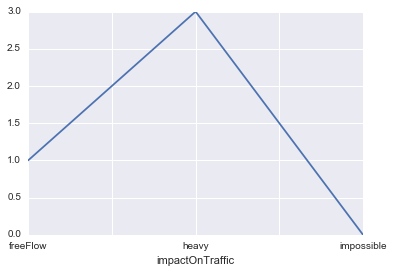

In [8]:
per_avline.plot()

Creacion de nuevos datos, para poder ver graficamente,la linea de Carriles Totales, Disponible y BLoqueados

In [9]:
df = data.groupby('impactOnTraffic').agg({'originalNumberOfLanes': lambda x: x.sum(), 
                                          'numberOfOperationalLanes': lambda x: x.sum(),
                                          'numberOfLanesRestricted': lambda x: x.sum()})
                                          

In [10]:
df

,numberOfOperationalLanes,originalNumberOfLanes,numberOfLanesRestricted
impactOnTraffic,,,
freeFlow,1,3,2
heavy,3,4,1
impossible,0,5,5


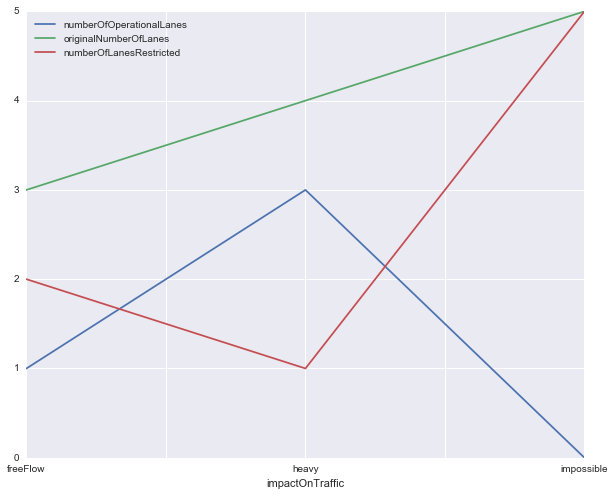

In [11]:
df.plot(figsize=(10,8))

Obtenendo datos como la media, quantiles, etc del dataframe

In [12]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
capacityRemaining,6.0,18.000000,30.886890,0.0,0.00,0.0,24.75,75.0
numberOfLanesRestricted,6.0,1.333333,0.516398,1.0,1.00,1.0,1.75,2.0
numberOfOperationalLanes,6.0,0.666667,1.211060,0.0,0.00,0.0,0.75,3.0
originalNumberOfLanes,6.0,2.000000,1.264911,1.0,1.00,1.5,2.75,4.0
delayTimeValue,6.0,350.000000,398.748041,0.0,0.00,300.0,600.00,900.0
timeseconds,6.0,102235.000000,157353.997637,4215.0,12971.25,38496.5,95426.50,413336.0
